# Regression: Predicting Continuous Values

## Learning Objectives
- Understand what regression is and when to use it
- Learn to build a linear regression model
- Evaluate model performance using metrics
- Visualize regression results

## What is Regression?
Regression is a supervised learning technique used to predict continuous numerical values. Unlike classification (which predicts categories), regression predicts quantities like prices, temperatures, or scores.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Step 1: Load and Explore the Data

We'll use a housing dataset to predict house prices based on features like area, number of bedrooms, and age.


In [45]:
# Load the dataset
df = pd.read_csv('housing_data.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())


First 5 rows of the dataset:
   area  bedrooms  age   price
0  1798         3    4  533666
1  1544         3    0  486270
2  1859         3    1  517025
3  2209         4    1  594596
4  1506         3   11  445432

Dataset shape: (1200, 4)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      1200 non-null   int64
 1   bedrooms  1200 non-null   int64
 2   age       1200 non-null   int64
 3   price     1200 non-null   int64
dtypes: int64(4)
memory usage: 37.6 KB
None

Basic statistics:
              area     bedrooms          age          price
count  1200.000000  1200.000000  1200.000000    1200.000000
mean   1615.655000     2.949167     4.435000  469673.324167
std     384.355218     0.837955     4.781718   77439.955379
min     800.000000     1.000000     0.000000  267111.000000
25%    1349.750000     2.000000     1.000000  420709.

## Step 2: Data Visualization

Let's visualize the relationships between features and the target variable (price).


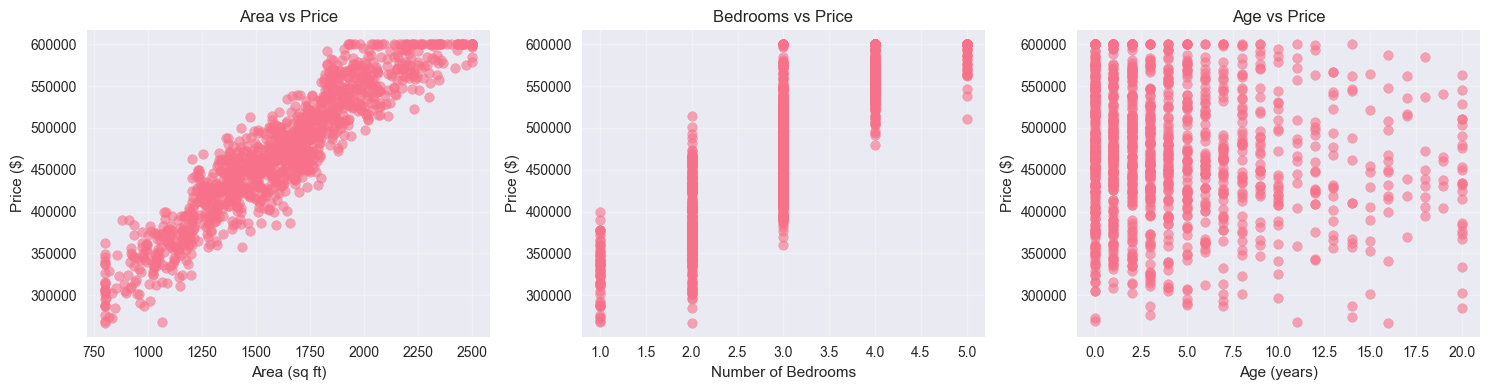


Correlation Matrix:
              area  bedrooms       age     price
area      1.000000  0.729264  0.015272  0.932155
bedrooms  0.729264  1.000000  0.016347  0.832631
age       0.015272  0.016347  1.000000 -0.105212
price     0.932155  0.832631 -0.105212  1.000000


In [46]:
# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Area vs Price
axes[0].scatter(df['area'], df['price'], alpha=0.6)
axes[0].set_xlabel('Area (sq ft)')
axes[0].set_ylabel('Price ($)')
axes[0].set_title('Area vs Price')
axes[0].grid(True, alpha=0.3)

# Plot 2: Bedrooms vs Price
axes[1].scatter(df['bedrooms'], df['price'], alpha=0.6)
axes[1].set_xlabel('Number of Bedrooms')
axes[1].set_ylabel('Price ($)')
axes[1].set_title('Bedrooms vs Price')
axes[1].grid(True, alpha=0.3)

# Plot 3: Age vs Price
axes[2].scatter(df['age'], df['price'], alpha=0.6)
axes[2].set_xlabel('Age (years)')
axes[2].set_ylabel('Price ($)')
axes[2].set_title('Age vs Price')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())


## Step 3: Prepare Data for Modeling

We need to separate features (X) from the target variable (y) and split into training and testing sets.


In [47]:
# Separate features and target
X = df[['area', 'bedrooms', 'age']]  # Features
y = df['price']  # Target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 960 samples
Testing set size: 240 samples


## Step 4: Build the Regression Model

We'll use Linear Regression, which finds the best line (or hyperplane) that fits the data.


In [48]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Model trained successfully!")
print(f"\nModel coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.2f}")


Model trained successfully!

Model coefficients: [  140.79366104 30155.74304003 -1957.60019228]
Model intercept: 162473.34


## Step 5: Evaluate Model Performance

We'll use several metrics to evaluate our regression model:
- **Mean Squared Error (MSE)**: Average squared difference between predicted and actual values
- **Root Mean Squared Error (RMSE)**: Square root of MSE, in same units as target
- **Mean Absolute Error (MAE)**: Average absolute difference
- **R² Score**: Proportion of variance explained (1.0 = perfect, 0.0 = no better than mean)


In [49]:
# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("=" * 50)
print("TRAINING SET METRICS")
print("=" * 50)
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"R² Score: {train_r2:.4f}")

print("\n" + "=" * 50)
print("TEST SET METRICS")
print("=" * 50)
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"R² Score: {test_r2:.4f}")


TRAINING SET METRICS
Mean Squared Error (MSE): 406399586.75
Root Mean Squared Error (RMSE): 20159.35
Mean Absolute Error (MAE): 15739.12
R² Score: 0.9309

TEST SET METRICS
Mean Squared Error (MSE): 368577905.16
Root Mean Squared Error (RMSE): 19198.38
Mean Absolute Error (MAE): 15533.75
R² Score: 0.9426


## Step 6: Visualize Predictions

Let's create visualizations to see how well our model performs.


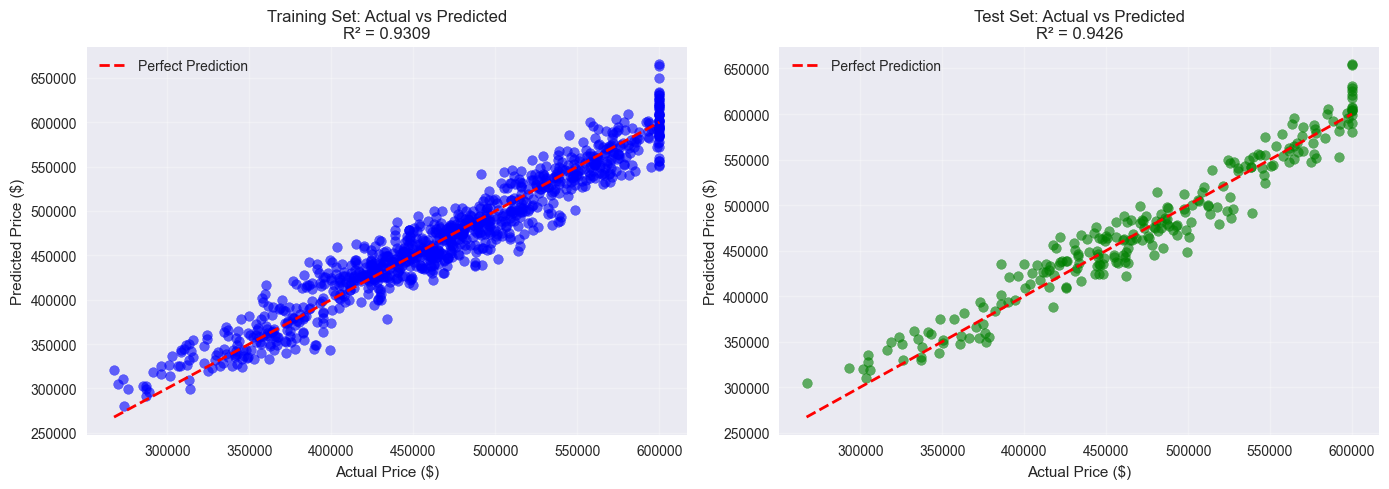

In [50]:
# Create visualization comparing actual vs predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Training set predictions
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], 
             [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test set predictions
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 7: Make Predictions on New Data

Let's use our trained model to predict prices for new houses.


In [51]:
# Create new data for prediction
new_houses = pd.DataFrame({
    'area': [1350, 1950, 1650],
    'bedrooms': [2, 4, 3],
    'age': [4, 1, 6]
})

# Make predictions
predictions = model.predict(new_houses)

# Display results
new_houses['predicted_price'] = predictions
print("Predictions for new houses:")
print(new_houses)


Predictions for new houses:
   area  bedrooms  age  predicted_price
0  1350         2    4    405025.869059
1  1950         4    1    555686.352339
2  1650         3    6    473504.510026


## Key Takeaways

1. **Regression** predicts continuous numerical values
2. **Linear Regression** finds the best line/hyperplane to fit the data
3. **Train/Test Split** helps evaluate model performance on unseen data
4. **Metrics** like RMSE, MAE, and R² help us understand model quality
5. **Visualization** helps us see how well predictions match actual values

## Practice Exercise

Try modifying the model to use only one feature (e.g., just 'area') and compare the results. What happens to the R² score?
